# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output CSV File
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [121]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [122]:
#ities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [123]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
# city_weather = requests.get(city_url).json()


In [124]:
#city_weather

In [125]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tikhvin
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hihifo
City not found. Skipping...
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | the pas
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | biloela
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | tazacorte
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | lerik
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | dryden
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | tik

Processing Record 35 of Set 4 | ancud
Processing Record 36 of Set 4 | port elizabeth
Processing Record 37 of Set 4 | nizhny tagil
Processing Record 38 of Set 4 | balabac
Processing Record 39 of Set 4 | atafu village
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | zinjibar
Processing Record 42 of Set 4 | shchigry
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | miracema do tocantins
Processing Record 45 of Set 4 | midvagur
Processing Record 46 of Set 4 | catio
Processing Record 47 of Set 4 | suva
Processing Record 48 of Set 4 | laojunmiao
Processing Record 49 of Set 4 | college
Processing Record 0 of Set 5 | al bawiti
Processing Record 1 of Set 5 | hawaiian paradise park
Processing Record 2 of Set 5 | yarmouth
Processing Record 3 of Set 5 | antsiranana
Processing Record 4 of Set 5 | newman
Processing Record 5 of Set 5 | forster
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of S

Processing Record 29 of Set 8 | nantucket
Processing Record 30 of Set 8 | aasiaat
Processing Record 31 of Set 8 | belyy yar
Processing Record 32 of Set 8 | kattivakkam
Processing Record 33 of Set 8 | san luis de la loma
Processing Record 34 of Set 8 | jaranwala
Processing Record 35 of Set 8 | puerto lempira
Processing Record 36 of Set 8 | vadso
Processing Record 37 of Set 8 | pemangkat
Processing Record 38 of Set 8 | bela
Processing Record 39 of Set 8 | bahia de kino
Processing Record 40 of Set 8 | la carolina
Processing Record 41 of Set 8 | bonyhad
Processing Record 42 of Set 8 | loch garman
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | schuyler
Processing Record 45 of Set 8 | krivosheino
Processing Record 46 of Set 8 | kasama
Processing Record 47 of Set 8 | arkhangel'sk
Processing Record 48 of Set 8 | kulia village
City not found. Skipping...
Processing Record 49 of Set 8 | zuwarah
Processing Record 0 of Set 9 | tobelo
Processing Record 1 of Set 9 | severo-

Processing Record 22 of Set 12 | nadym
Processing Record 23 of Set 12 | ashland
Processing Record 24 of Set 12 | new martinsville
Processing Record 25 of Set 12 | padegan-e manjil
City not found. Skipping...
Processing Record 26 of Set 12 | dhidhdhoo
Processing Record 27 of Set 12 | ressano garcia
Processing Record 28 of Set 12 | carahue
Processing Record 29 of Set 12 | bikin
Processing Record 30 of Set 12 | umm kaddadah
Processing Record 31 of Set 12 | gao
Processing Record 32 of Set 12 | bratsk
Processing Record 33 of Set 12 | zvishavane
Processing Record 34 of Set 12 | rye
Processing Record 35 of Set 12 | mogadishu
Processing Record 36 of Set 12 | crucecita
Processing Record 37 of Set 12 | khovd
Processing Record 38 of Set 12 | uray
Processing Record 39 of Set 12 | kayangel
Processing Record 40 of Set 12 | sagaing
Processing Record 41 of Set 12 | dolores
Processing Record 42 of Set 12 | murzuq
-----------------------------
Data Retrieval Complete      
-----------------------------


In [126]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [127]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tikhvin,59.6451,33.5294,74.21,76,35,5.06,RU,1691345390
1,port-aux-francais,-49.3500,70.2167,40.71,91,97,29.10,TF,1691345247
2,kone,-21.0595,164.8658,60.35,91,55,5.28,NC,1691345391
3,albany,42.6001,-73.9662,82.67,46,30,1.99,US,1691345366
4,adamstown,-25.0660,-130.1015,68.65,69,14,22.28,PN,1691345391


In [128]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [129]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tikhvin,59.6451,33.5294,74.21,76,35,5.06,RU,1691345390
1,port-aux-francais,-49.3500,70.2167,40.71,91,97,29.10,TF,1691345247
2,kone,-21.0595,164.8658,60.35,91,55,5.28,NC,1691345391
3,albany,42.6001,-73.9662,82.67,46,30,1.99,US,1691345366
4,adamstown,-25.0660,-130.1015,68.65,69,14,22.28,PN,1691345391


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [130]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

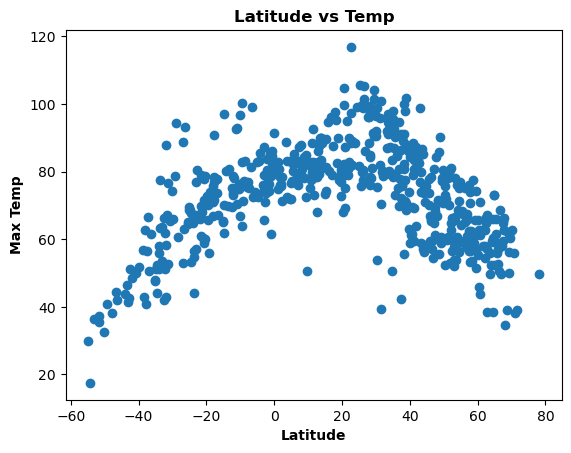

In [131]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Max Temp", fontweight="bold")
plt.title("Latitude vs Temp", fontweight="bold")

# Save the figure

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

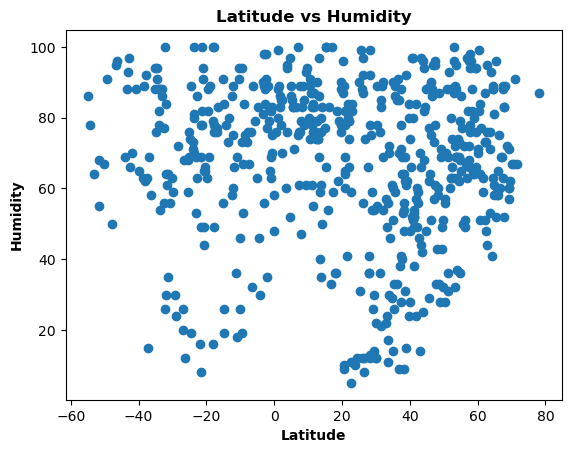

In [132]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.title("Latitude vs Humidity", fontweight="bold")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

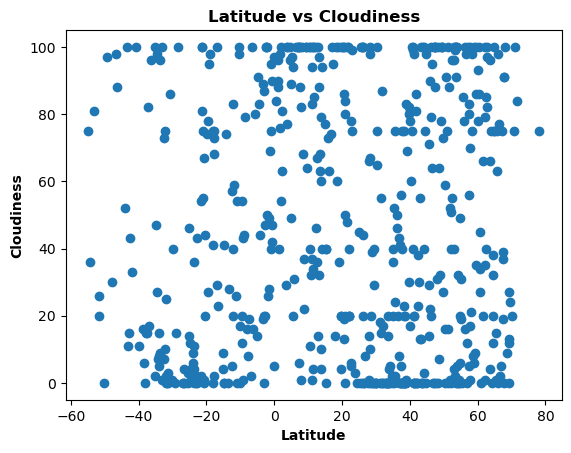

In [133]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.title("Latitude vs Cloudiness", fontweight="bold")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

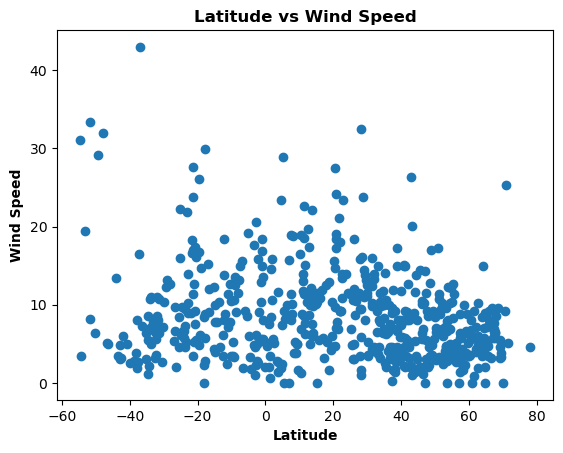

In [134]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.title("Latitude vs Wind Speed", fontweight="bold")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [135]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [136]:
# city_data_df.head()

In [137]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tikhvin,59.6451,33.5294,74.21,76,35,5.06,RU,1691345390
3,albany,42.6001,-73.9662,82.67,46,30,1.99,US,1691345366
5,pacific grove,36.6177,-121.9166,75.20,91,20,10.00,US,1691345267
6,the pas,53.8251,-101.2541,76.17,37,5,12.24,CA,1691345391
7,enewetak,11.3474,162.3373,82.90,76,100,8.57,MH,1691345255


In [138]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,40.71,91,97,29.10,TF,1691345247
2,kone,-21.0595,164.8658,60.35,91,55,5.28,NC,1691345391
4,adamstown,-25.0660,-130.1015,68.65,69,14,22.28,PN,1691345391
8,waitangi,-43.9535,-176.5597,43.83,69,52,13.44,NZ,1691345392
10,biloela,-24.4167,150.5000,53.28,89,1,6.64,AU,1691345392


###  Temperature vs. Latitude Linear Regression Plot

In [139]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.03x + 8.22'

The correlation coefficient is: -0.6


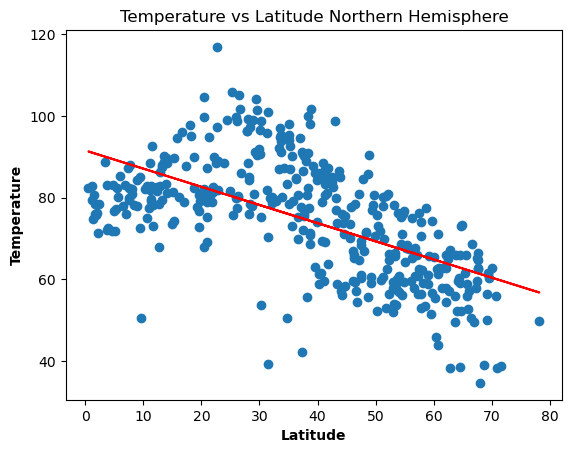

In [140]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
import scipy.stats as st

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Temperature", fontweight="bold")
plt.title("Temperature vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()
           


The correlation coefficient is: 0.77


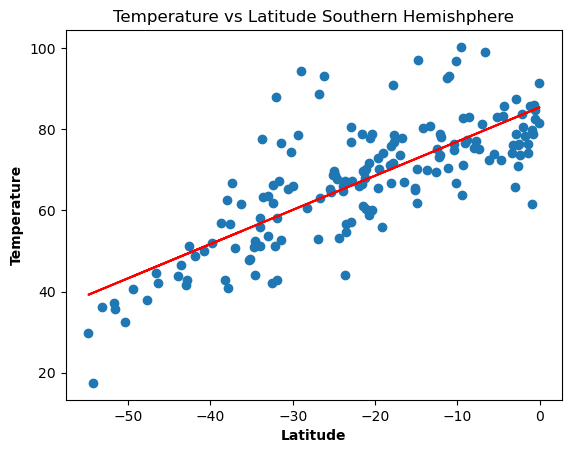

In [141]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Temperature", fontweight="bold")
plt.title("Temperature vs Latitude Southern Hemishphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()
           
# south_regress_values

**Discussion about the linear relationship:** 

- There is a negative correlation of -0.63 between Latitude and Temperature in the Southern hemisphere. Meaning the farther north you travel away from Latitude 0, the lower the temperature will be.

- There is a strong positive correlation of 0.77 between Latitude and Temperature in the Southern hemisphere. Meaning the closer you get to the equator, the higher the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.01


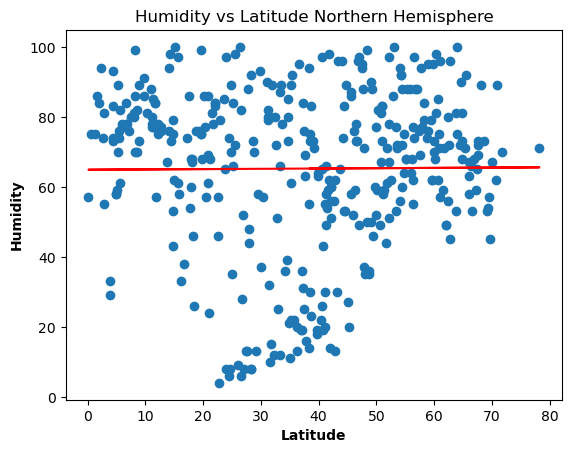

In [142]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.title("Humidity vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()
           

The correlation coefficient is: -0.03


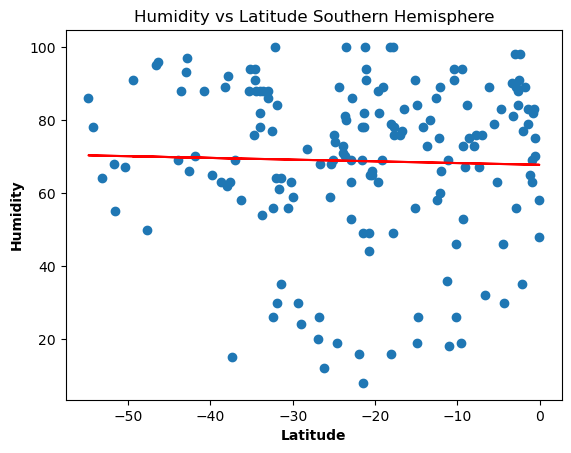

In [143]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.title("Humidity vs Latitude Southern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** 

- Looking at the correlation coefficient numbers for both the Northern and Southern Hemisphere's, you can see they are very near zero. Meaning there is little evidence that latitude effects humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.11


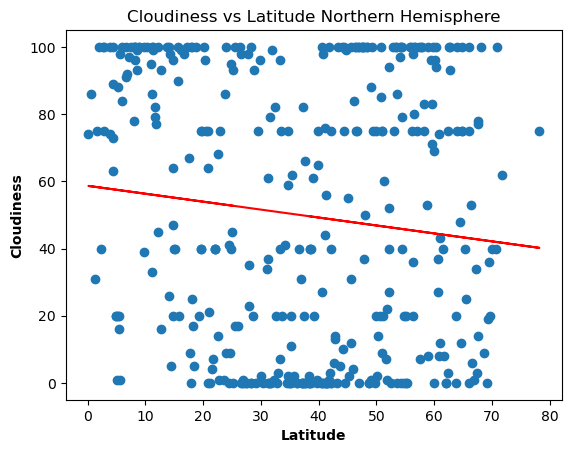

In [144]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.title("Cloudiness vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

The correlation coefficient is: 0.1


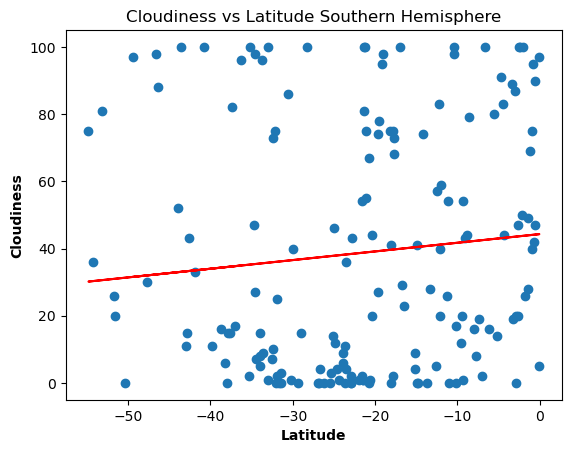

In [145]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.title("Cloudiness vs Latitude Southern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** 

- Looking at the Linear Regression line it is very obvious there is little correllation between cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

In [146]:
north_hemi_df.keys()

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

The correlation coefficient is: -0.12


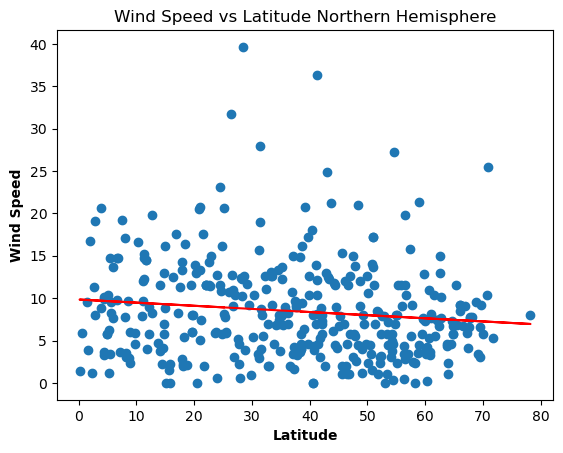

In [147]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.title("Wind Speed vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

The correlation coefficient is: -0.09


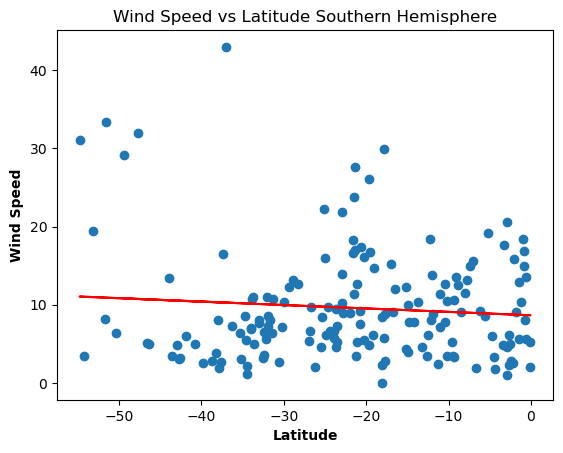

In [148]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.title("Wind Speed vs Latitude Southern Hemisphere")
plt.annotate(line_eq, (0, 100), fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** 

- With Correlation Coefficient numbers both near zero, there is almost no correltion betwee Wind Speed and Latitude.